In [3]:
import dill
import pandas as pd
import numpy as np
import requests
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
# Load Home Attributes dataframe

with open(r'.\Capstone\df_filtered.pkd', 'rb') as f:
    #home_list.extend(dill.load(f))
    df = dill.load(f)  
 


In [5]:
# load and format Demo CSV files

def read_csv_files(file_name1, file_name2, columns):
    
    id_columns = ['Geography', 'Geographic Area Name']
    columns.extend(id_columns)
    path=r'.\DS Cource\Capstone\Demographics Data\'
    
    df1= pd.read_csv(path+file_name1, header=1, usecols=columns)
    df2= pd.read_csv(path+file_name2, header=1, usecols=columns)
    
    return pd.concat([df1, df2], axis=0, ignore_index=True)

In [ ]:
#read demo 1 files

# Employed Pop, Pop Below Povery(droppped), Median Household Income

columns = {'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over': 'Population 16 years and over',
           'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed': 'Employed Population',
           'Estimate!!INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)': 'Median household income'}
           

df_demo1 = read_csv_files('Employed Pop, Pop Below Pov Line, Median Household  Income - NJ.csv',
                          'Employed Pop, Pop Below Pov Line, Median Household  Income - PA.csv',
                          list(columns.keys()))


# add fipstrim - id column to join with home attributes data
df_demo1['fipsTrim'] = df_demo1['Geography'].str[-11:]

#rename columns
df_demo1 = df_demo1.rename(columns=columns)

#change dtypes to numeric
column_names = list(columns.values())
for name in column_names:
    df_demo1[name] = pd.to_numeric(df_demo1[name], errors='coerce')    
    
# add new feature - employed population%
df_demo1['Employed Population %'] = df_demo1['Employed Population']/df_demo1['Population 16 years and over']

In [ ]:
#read demo 2 files

# Employed Pop, Pop Below Povery(droppped), Median Household Income

columns = {'Estimate!!SEX AND AGE!!Total population': 'Total Population',
           'Estimate!!SEX AND AGE!!Total population!!Median age (years)': 'Median age (years)',
           'Estimate!!RACE!!Total population!!One race!!Black or African American': 'Minority Pop AA',
           #'Estimate!!RACE!!Total population!!One race!!Asian': 'Minority Pop AS',
           'Estimate!!RACE!!Total population!!One race!!White': 'Majority Pop White'
           
          }
           
#minorities AA ans AS have high margin of error in the data
    
df_demo2 = read_csv_files('Population, Minority Percentages and Median Income - NJ.csv',
                          'Population, Minority Percentages and Median Income - PA.csv',
                          list(columns.keys()))


# add fipstrim
df_demo2['fipsTrim'] = df_demo2['Geography'].str[-11:]

#rename columns
df_demo2 = df_demo2.rename(columns=columns)


#change dtypes to numeric
column_names = list(columns.values())
for name in column_names:
    df_demo2[name] = pd.to_numeric(df_demo2[name], errors='coerce')    
    

df_demo2['Minority Pop % Calc'] = 1-(df_demo2['Majority Pop White']/df_demo2['Total Population'])

In [ ]:
#read demo 3 files

# Employed Pop, Pop Below Povery(droppped), Median Household Income

columns = {'Estimate!!VALUE!!Owner-occupied units!!Median (dollars)': 'Median Value of Owner-occupied units '
          }
           

df_demo3 = read_csv_files('Median Value of Owner Pccupied Units - NJ.csv',
                          'Median Value of Owner Pccupied Units - PA.csv',
                          list(columns.keys()))


# add fipstrim
df_demo3['fipsTrim'] = df_demo3['Geography'].str[-11:]

#rename columns
df_demo3 = df_demo3.rename(columns=columns)


#change dtypes to numeric
column_names = list(columns.values())
for name in column_names:
    df_demo3[name] = pd.to_numeric(df_demo3[name], errors='coerce')  

In [ ]:
df_demo = df_demo1.merge(df_demo2, on='fipsTrim', how='outer')
df_demo = df_demo.merge(df_demo3, on='fipsTrim', how='outer')
df_demo = df_demo.drop(['Geography_y', 'Geographic Area Name_y', 'Geography', 'Geographic Area Name'], axis=1)
df_demo.info()

In [10]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 0 to 5626
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Geography_x                            5627 non-null   object 
 1   Geographic Area Name_x                 5627 non-null   object 
 2   Population 16 years and over           5627 non-null   int64  
 3   Employed Population                    5627 non-null   int64  
 4   Median household income                5509 non-null   float64
 5   fipsTrim                               5627 non-null   object 
 6   Employed Population %                  5583 non-null   float64
 7   Total Population                       5616 non-null   float64
 8   Median age (years)                     5580 non-null   float64
 9   Majority Pop White                     5627 non-null   int64  
 10  Minority Pop AA                        5627 non-null   int64  
 11  Mino

In [4]:
with open('.\Demographics Data\df_combined.pkd', 'rb') as f:
    df_combined = dill.load(f)

In [5]:
X = df_combined[df_combined['propertyType']=='Single Family']
y= X['lastSalePrice']
X = X.drop('lastSalePrice', axis=1)

In [12]:
def plotter(column, xlims):
    valid_rows = X[column].notna()
    plt.plot(X.loc[valid_rows, column], y[valid_rows], '.', color='lightblue', alpha=.05)
    plt.xlabel(column)
    plt.ylabel('Home price ($)')
    plt.ylim([0, 1.5e6])
    crr, pvalue = pearsonr(X.loc[valid_rows, column], y[valid_rows])
    print(crr, pvalue)
    plt.xlim(xlims)


0.4842184356535836 0.0


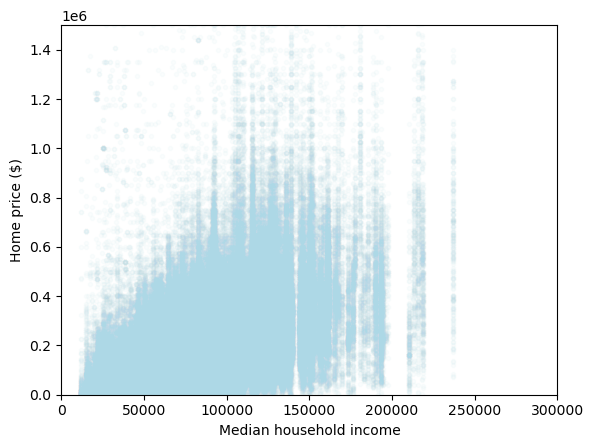

In [18]:
plotter('Median household income', [0, .3e6])

0.604704166380928 0.0


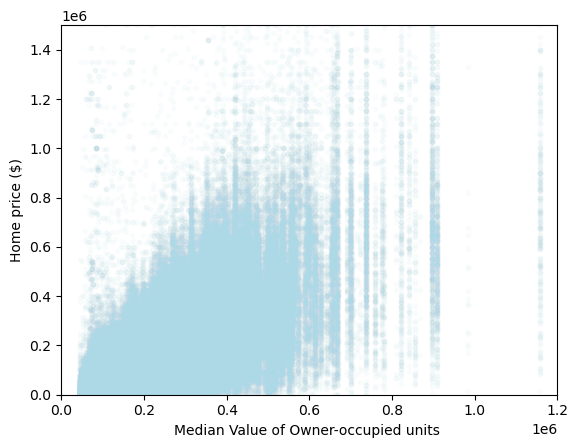

In [19]:
plotter('Median Value of Owner-occupied units ', [0, 1.2e6])